In [1]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
rng = np.random.default_rng()

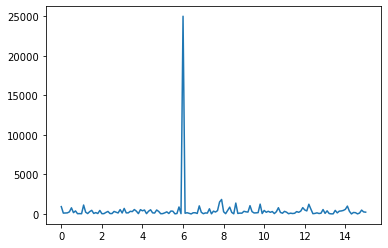

In [2]:
import scipy.io.wavfile
from scipy.io import wavfile
import librosa
import os.path

path="C:\\Users\\안동진\\Downloads"
fname="\\docs_feature_extraction_example.wav"

data, signal = wavfile.read(path+fname)

sampling_rate = 30.0

time = np.arange(0, 10, 1/sampling_rate)

data = np.sin(2*np.pi*6*time) + np.random.randn(len(time))

fourier_transform = np.fft.rfft(data)

abs_fourier_transform = np.abs(fourier_transform)

power_spectrum = np.square(abs_fourier_transform)

frequency = np.linspace(0, sampling_rate/2, len(power_spectrum))

plt.plot(frequency, power_spectrum)

In [15]:
from scipy.signal import butter, lfilter

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y


# BPF setting ( 나머지 주파수는 자르고 40 ~ 100 hz 만 추출하겠다.)
for i in len(frequency):
    highcut[i] = 1/frequency[i]
    
# BPF
for i in len(frequency):
    yy[i] = butter_bandpass_filter(signal, highcut[i], Fs, order=5)

# 1. 원 신호 Plot
plt.plot(t, signal, 'y', label='origin')

# 2. 필터 적용된 Plot
for i in len(frequency):
    plt.plot(t, yy[i], 'b', label='filtered data')
plt.legend()
plt.show() 
    
# 3. 필터 적용된 FFT Plot
for i in len(frequency):
    yf = np.fft.fft(yy[i]) / N

yf= yf[range(int(N/2))]


plt.title("BPF")
plt.plot(freq, abs(yf), 'k')
plt.xlim(0, Fs / 20)
plt.show()

TypeError: 'int' object is not iterable